#Lab 01

Bibliotecas usadas

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

1) Carregue o dataset Iris

In [ ]:
#1) Carregue o dataset Iris
iris = load_iris()

#2) Dê uma fuçada nos dados.

In [ ]:
#2) Dê uma fuçada nos dados.

#Imprimir a descrição completa do dataset
#print("\nDescrição completa do dataset:")
#print(iris.DESCR)

#Imprimir os atributos
print("\nNomes dos atributos:")
print(iris.feature_names)

#Imprimir as classes
print("\nNomes das classes:")
print(iris.target_names)


#Converter para DataFrame para facilitar a visualização
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Imprimir os 5 primeiros de cada classe
for target_value in range(len(iris.target_names)):
    print(f"\n5 primeiros registros da classe {iris.target_names[target_value]}:")
    print(df_iris[iris.target == target_value].head(5).to_string(index=False))


#Imprimir TODOS os registros do dataset
#print("\n Registros do dataset Iris:")
#print(df_iris.to_string())



Nomes dos atributos:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Nomes das classes:
['setosa' 'versicolor' 'virginica']

5 primeiros registros da classe setosa:
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
               5.1               3.5                1.4               0.2
               4.9               3.0                1.4               0.2
               4.7               3.2                1.3               0.2
               4.6               3.1                1.5               0.2
               5.0               3.6                1.4               0.2

5 primeiros registros da classe versicolor:
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
               7.0               3.2                4.7               1.4
               6.4               3.2                4.5               1.5
               6.9               3.1                4.9               1.5
             

#3) Calcule a média e o desvio padrão de cada atributo

In [ ]:
#3) Calcule a média e o desvio padrão de cada atributo
media = df_iris.mean()
print("\nMédia de cada atributo:")
print(media)

desvio_padrao = df_iris.std()
print("\nDesvio padrão de cada atributo:")
print(desvio_padrao)



Média de cada atributo:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Desvio padrão de cada atributo:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


#4) Calcule a média e desvio padrão de cada atributo para cada classe

In [ ]:
#4) Calcule a média e desvio padrão de cada atributo para cada classe
# 0 = setosa, 1 = versicolor, 2 = virginica
media_classe = df_iris.groupby(iris.target).mean()
print("\nMédia de cada atributo para cada classe:")
print(media_classe)

desvio_padrao_classe = df_iris.groupby(iris.target).std()
print("\nDesvio padrão de cada atributo para cada classe:")
print(desvio_padrao_classe)


Média de cada atributo para cada classe:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0              5.006             3.428              1.462             0.246
1              5.936             2.770              4.260             1.326
2              6.588             2.974              5.552             2.026

Desvio padrão de cada atributo para cada classe:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.352490          0.379064           0.173664          0.105386
1           0.516171          0.313798           0.469911          0.197753
2           0.635880          0.322497           0.551895          0.274650


#5) Plote os resultados em um box plot

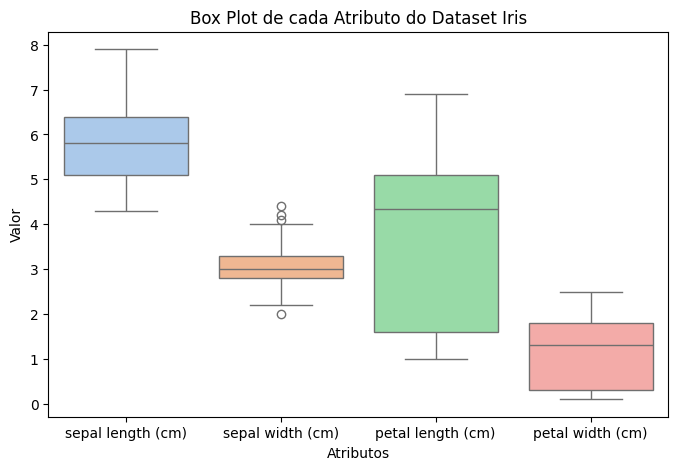

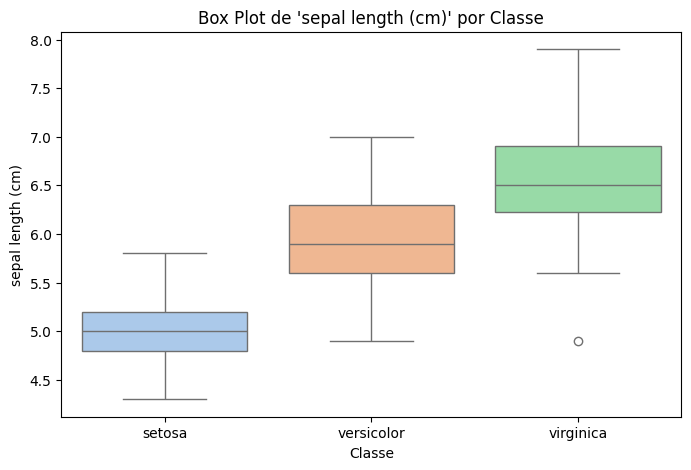

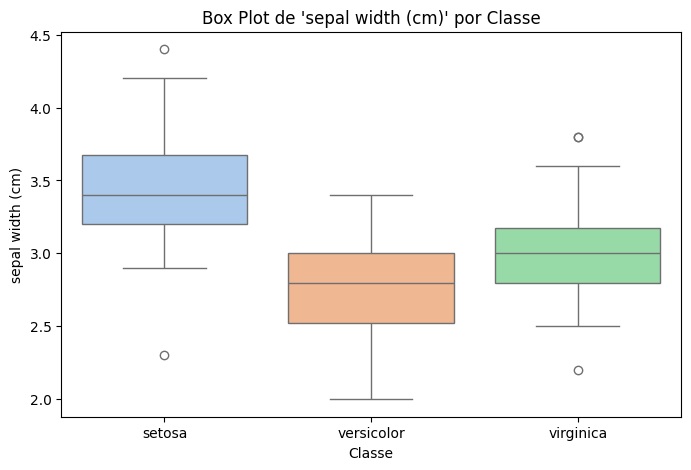

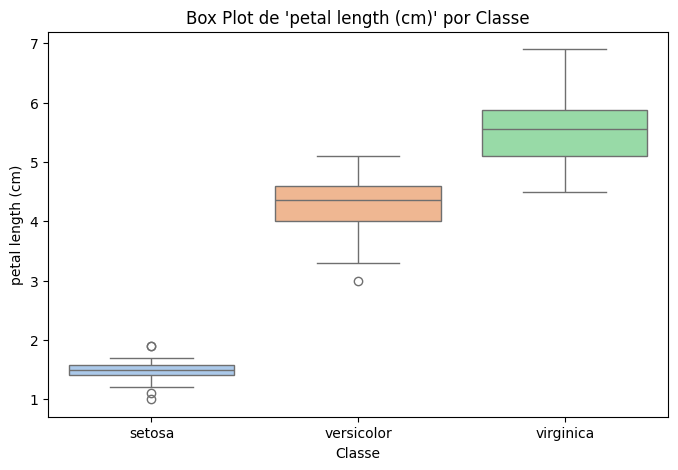

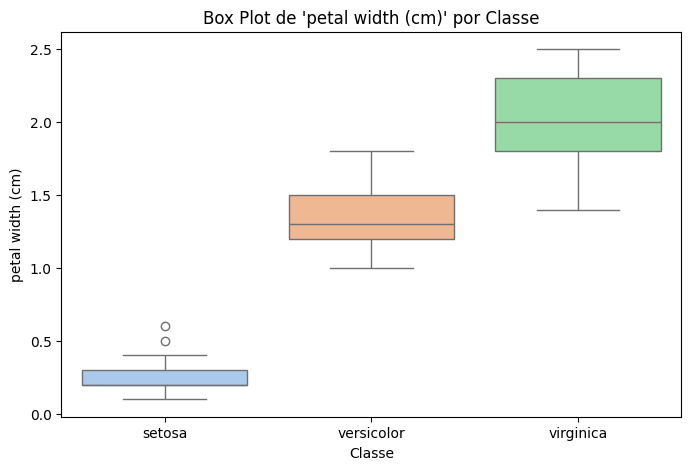

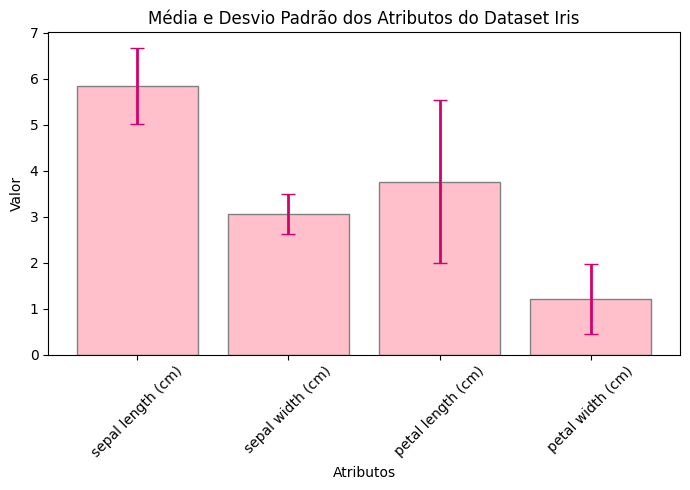

In [ ]:
#5) Plote os resultados em um box plot

# Adicionar a coluna de classes (target)
df_iris['target'] = iris.target
df_iris['target_name'] = df_iris['target'].apply(lambda x: iris.target_names[x])


# Box plot para cada atributo (sepal length, sepal width, petal length, petal width)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_iris.drop(columns='target'), orient='vertical', palette='pastel')

# Título e rótulos
plt.title("Box Plot de cada Atributo do Dataset Iris")
plt.ylabel("Valor")
plt.xlabel("Atributos")

# Mostrar o gráfico
plt.show()

print("\n")

atributos = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Boxplots para cada atributo
for atributo in atributos:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target_name', y=atributo, data=df_iris, hue='target_name', palette='pastel', legend=False)
    plt.title(f"Box Plot de '{atributo}' por Classe")
    plt.xlabel("Classe")
    plt.ylabel(atributo)
    plt.show()
    print("\n")

# Gráfico de barras para a média, com barras de erro para o desvio padrão
plt.figure(figsize=(7, 5))

# Plotar as médias com as barras de erro
plt.bar(media.index, media, yerr=desvio_padrao, capsize=5, color='pink', edgecolor='grey', error_kw=dict(ecolor='#D5006D', elinewidth=2, capsize=5))

# Título e rótulos
plt.title("Média e Desvio Padrão dos Atributos do Dataset Iris")
plt.xlabel("Atributos")
plt.ylabel("Valor")
plt.xticks(rotation=45)

# Mostrar
plt.tight_layout()
plt.show()

#6) Normalize os dados (MinMaxScaler)

In [ ]:
#6) Normalize os dados (MinMaxScaler)

# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar os dados, excluindo a coluna 'target' e 'target_name'
df_iris_normalized = pd.DataFrame(scaler.fit_transform(df_iris.drop(columns=['target', 'target_name'])), columns=iris.feature_names)

# Re-add a coluna target
df_iris_normalized['target'] = df_iris['target']

# Exibir os dados normalizados junto com a classe (target)
print(df_iris_normalized.head())  # Exibe as primeiras 5 linhas dos dados normalizados


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


#7) Plote novamente. Mas antes, imagine: o que deve acontecer?
R: Com a normalização, os dados ficam em uma escala comum (por exemplo, entre 0 e 1), o que facilita a comparação entre atributos que originalmente possuem escalas diferentes. Isso ajuda a evitar que atributos com valores maiores dominem a análise, proporcionando uma comparação mais justa e equilibrada entre eles.

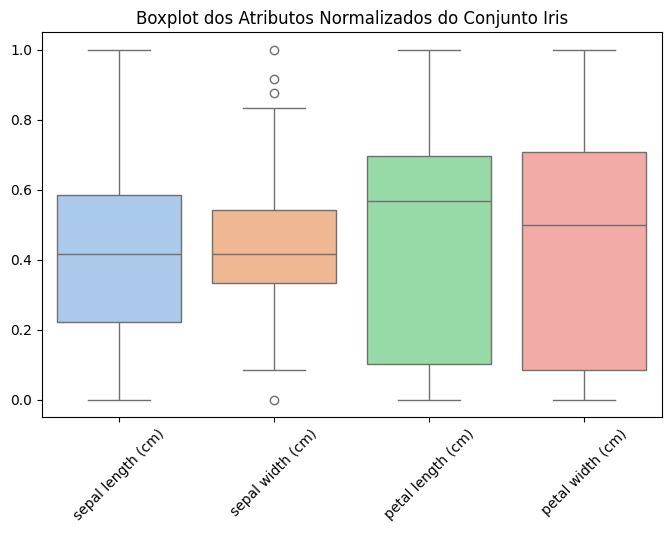

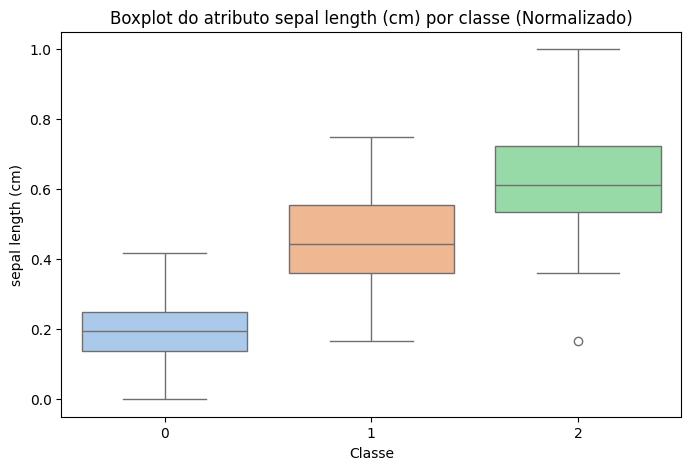

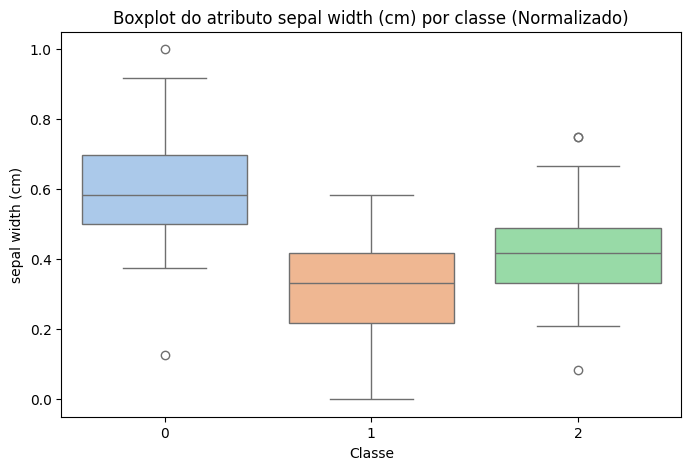

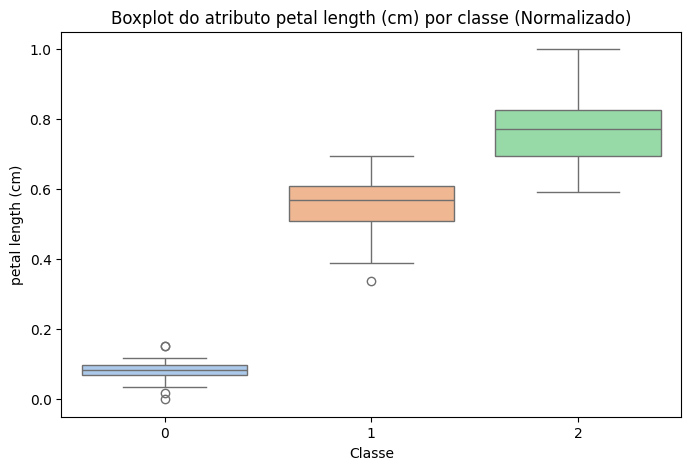

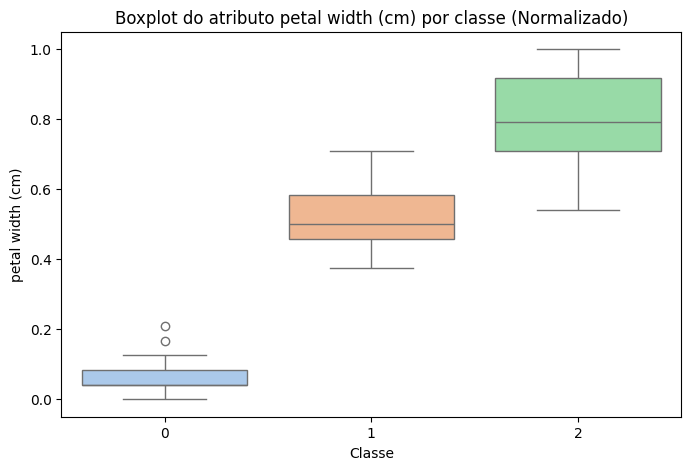

In [ ]:
#7) Plote novamente. Mas antes, imagine: o que deve acontecer?

# Gráfico por atributo
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_iris_normalized.drop(columns='target'), palette='pastel')
plt.title("Boxplot dos Atributos Normalizados do Conjunto Iris")
plt.xticks(rotation=45)
plt.show()
print("\n")

# Gráficos por classe
# 0 = setosa, 1 = versicolor, 2 = virginica
for col in iris.feature_names:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_iris_normalized['target'], y=df_iris_normalized[col], hue=df_iris_normalized['target'], palette='pastel', legend=False)
    plt.title(f"Boxplot do atributo {col} por classe (Normalizado)")
    plt.xlabel("Classe")
    plt.ylabel(col)
    plt.show()
    print("\n")


#8) Repita o 7 com standardização dos dados

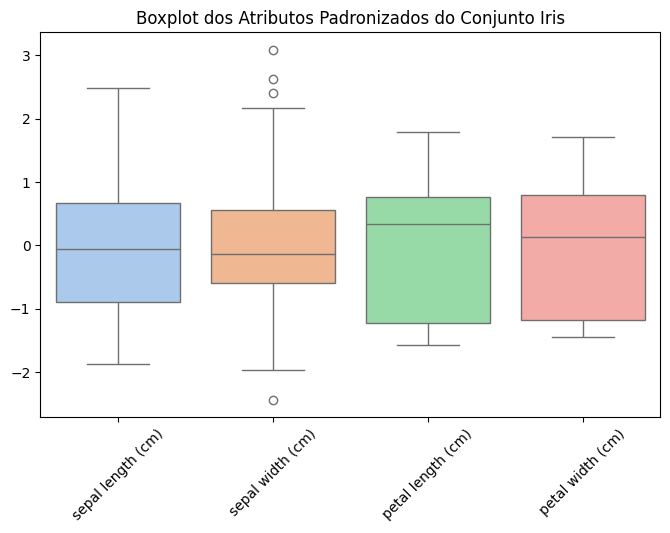

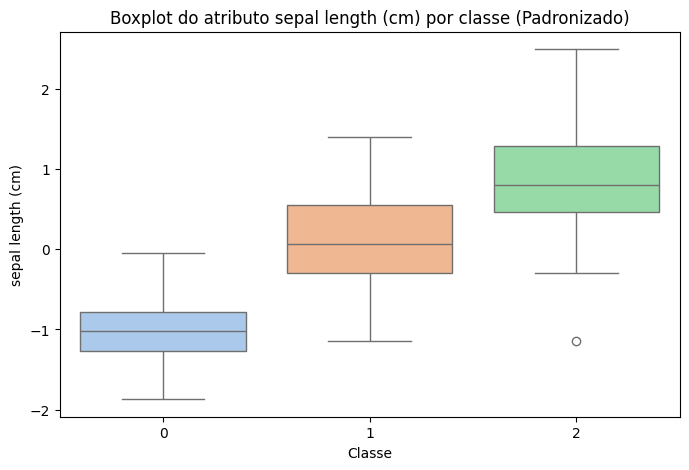

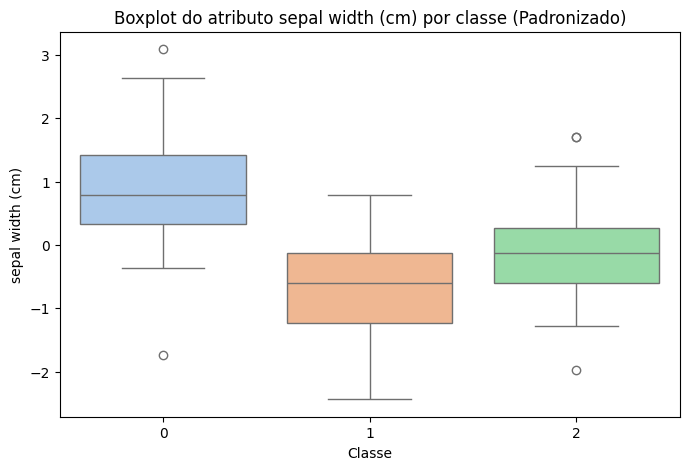

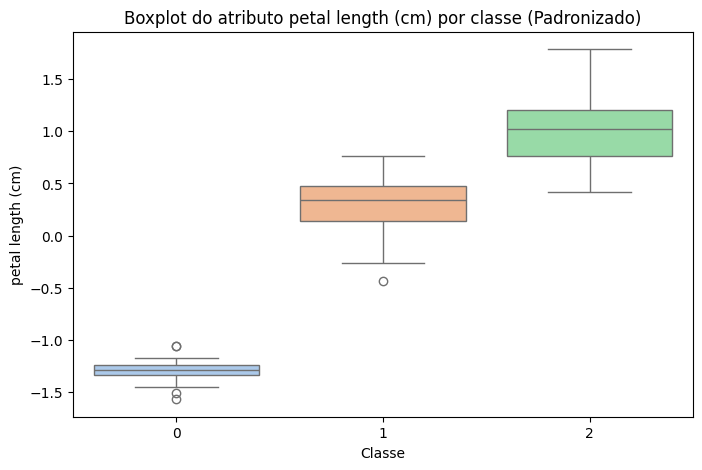

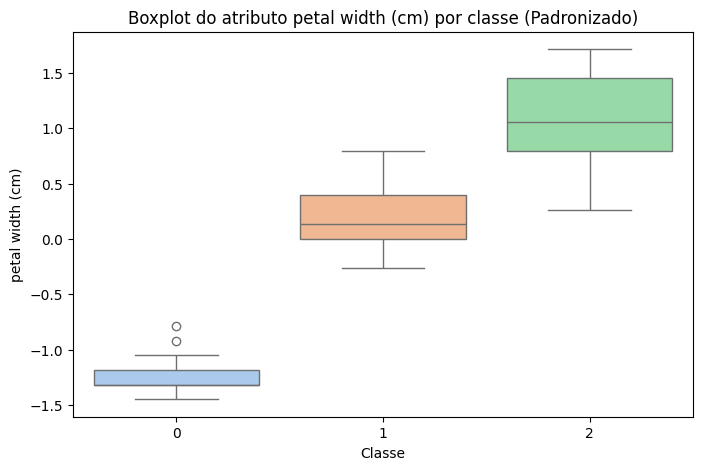



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
#8) Repita o 7 com standardização dos dados

# Padronizar os dados (StandardScaler)
scaler = StandardScaler()
df_iris_standarized = pd.DataFrame(scaler.fit_transform(df_iris.drop(columns=['target', 'target_name'])), columns=iris.feature_names)
df_iris_standarized['target'] = iris.target

# Gráfico por atributo
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_iris_standarized.drop(columns='target'), palette='pastel')
plt.title("Boxplot dos Atributos Padronizados do Conjunto Iris")
plt.xticks(rotation=45)
plt.show()
print("\n")

# Gráficos por classe
# 0 = setosa, 1 = versicolor, 2 = virginica
for col in iris.feature_names:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_iris_standarized['target'], y=df_iris_standarized[col], hue=df_iris_standarized['target'], palette='pastel', legend=False)
    plt.title(f"Boxplot do atributo {col} por classe (Padronizado)")
    plt.xlabel("Classe")
    plt.ylabel(col)
    plt.show()
    print("\n")

# Exibir dados padronizados
print(df_iris_standarized.head())

#9) Plote um histograma que mostre bem a diferença das 3 classes em 1 atributo

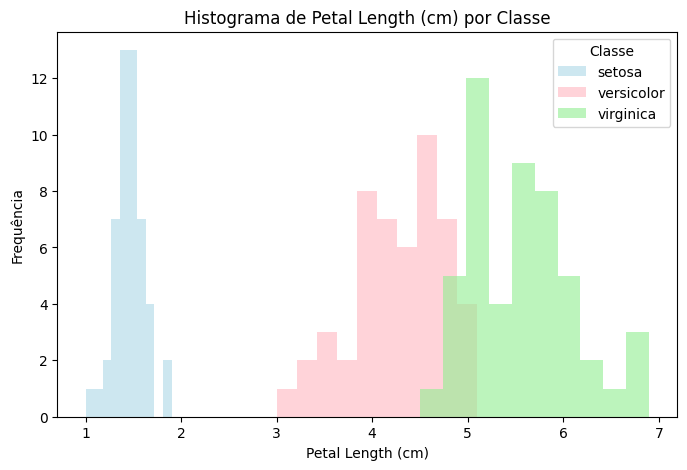

In [ ]:
#9) Plote um histograma que mostre bem a diferença das 3 classes em 1 atributo

# Histograma que mostra a diferença das classes no atributo "petal length (cm)"
plt.figure(figsize=(8, 5))

# Histograma para cada classe
colors = ['lightblue', 'lightpink', 'lightgreen']
for i, class_name in enumerate(iris.target_names):
    plt.hist(df_iris[df_iris['target'] == i]['petal length (cm)'],
             bins=10, alpha=0.6, label=class_name, color=colors[i])

plt.title("Histograma de Petal Length (cm) por Classe")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequência")
plt.legend(title="Classe")

plt.show()


10) Plote um scatter plot que mostre bem a diferença das 3 classes em 1 atributo


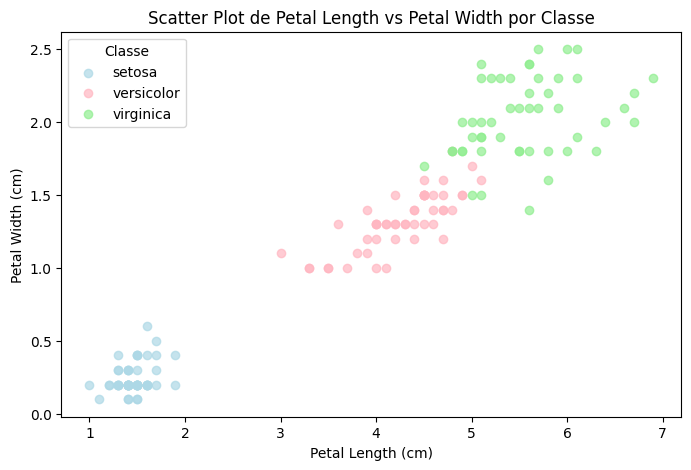

In [ ]:
#10) Plote um scatter plot que mostre bem a diferença das 3 classes em 1 atributo

# Scatter plot para mostrar a diferença das classes usando dois atributos
plt.figure(figsize=(8, 5))

# Plotar os pontos para cada classe
colors = ['lightblue', 'lightpink', 'lightgreen']
for i, class_name in enumerate(iris.target_names):
    plt.scatter(df_iris[df_iris['target'] == i]['petal length (cm)'],
                df_iris[df_iris['target'] == i]['petal width (cm)'],
                label=class_name, alpha=0.7, color=colors[i])

plt.title("Scatter Plot de Petal Length vs Petal Width por Classe")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Classe")

plt.show()


11) Olhe novamente os exemplos marcados Aula-1B. Explique os argumentos usados nas funções plt.hist e plt.scatter

# Função plt.hist
#Link: [Documentação plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

# x: Array de dados que queremos agrupar em um histograma. No exemplo: iris.data[iris.target==label, x_index].  
# bins=5: Número de intervalos para a contagem de frequência.  
# label: Nome para identificação de cada grupo no histograma.  
# color: Cor das barras para cada classe (ex: 'blue', 'red', 'green').  
# alpha=0.6: Transparência dos gráficos para permitir melhor sobreposição.  

# Função plt.scatter
# Link: [Documentação plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

# x e y: Coordenadas dos pontos a serem plotados. No exemplo: X[:, 0], X[:, 1] (respectivamente o comprimento e largura da sépala).  
# c=y: Define as cores dos pontos com base nas classes (0, 1, 2).  
# cmap=plt.cm.Set1: Mapa de cores que define uma cor única para cada classe.  


12) Vamos tentar reduzir o número de atributos? Crie um novo atributo
“sepal_area” que é o produto da largura e comprimento da sépala

In [ ]:
#12) Vamos tentar reduzir o número de atributos? Crie um novo atributo “sepal_area” que é o produto da largura e comprimento da sépala

# Calcular o novo atributo "sepal_area"
df_iris['sepal_area'] = df_iris['sepal length (cm)'] * df_iris['sepal width (cm)']

# Exibir as primeiras linhas para verificar
print(df_iris.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  sepal_area  
0       0      setosa       17.85  
1       0      setosa       14.70  
2       0      setosa       15.04  
3       0      setosa       14.26  
4       0      setosa       18.00  


13) Faça o mesmo com a pétala. (Guarde esses dados resultantes porque vamos usar eles mais pra frente)

In [ ]:
#13) Faça o mesmo com a pétala. (Guarde esses dados resultantes porque vamos usar eles mais pra frente)

# Calcular o novo atributo "petal_area"
df_iris['petal_area'] = df_iris['petal length (cm)'] * df_iris['petal width (cm)']

# Exibir as primeiras linhas para verificar
print(df_iris.head())

# Salvar os dados em um arquivo CSV para uso posterior
#df_iris.to_csv("iris_with_areas.csv", index=False)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  sepal_area  petal_area  
0       0      setosa       17.85        0.28  
1       0      setosa       14.70        0.28  
2       0      setosa       15.04        0.26  
3       0      setosa       14.26        0.30  
4       0      setosa       18.00        0.28  


14) Rode novamente a visualização completa dos atributos usando SubPlots (como no item 1-C, por exemplo) usando os dados com dimensionalidade reduzida do item 12. (Lembre que antes tinhamos 16 SubPlots, e agora?) R: Temos 6 atributos no total. Isso significa que o scatter plot de matriz terá 6x6 = 36 subplots.


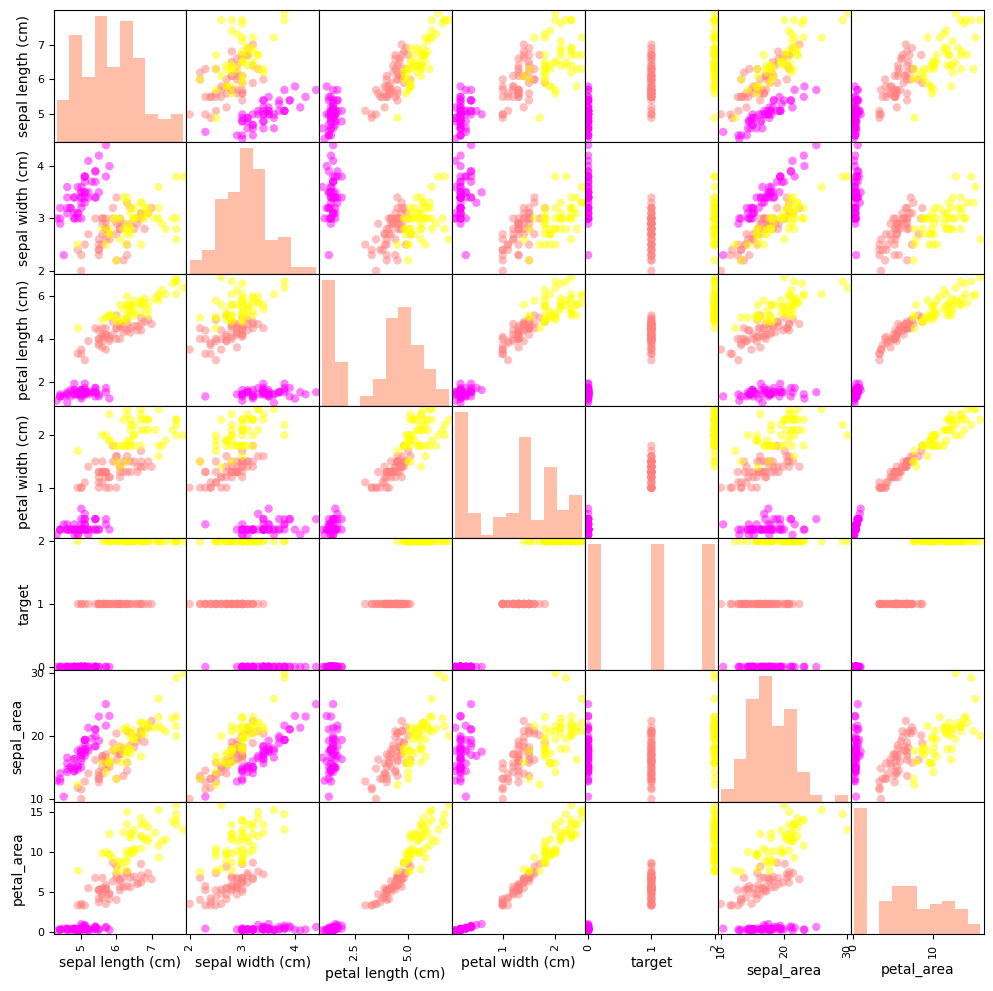

In [ ]:
#14) Rode novamente a visualização completa dos atributos usando SubPlots (como no item 1-C, por exemplo) usando os dados com dimensionalidade reduzida do item 12.
# (Lembre que antes tinhamos 16 SubPlots, e agora?) R: Temos 6 atributos no total. Isso significa que o scatter plot de matriz terá 6x6 = 36 subplots.

# Adicionar os novos atributos
df_iris['sepal_area'] = df_iris['sepal length (cm)'] * df_iris['sepal width (cm)']
df_iris['petal_area'] = df_iris['petal length (cm)'] * df_iris['petal width (cm)']

# Rodar a visualização completa dos atributos usando scatter_matrix
pd.plotting.scatter_matrix(df_iris,
                           c=iris.target,
                           figsize=(12, 12),
                           marker='o',
                           hist_kwds={'bins': 10, 'alpha': 0.5, 'color':'coral'},
                           diagonal='hist',
                           cmap=plt.cm.spring
                           )

plt.show()